In [1]:
import pandas as pd
import numpy as np
import datetime 
import time     


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

import umap
from sklearn.mixture import GaussianMixture

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/opt/conda/envs/bigcon/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
test_0 = pd.read_csv("./DL_dataset/fold_0_test_df.csv")
test_1 = pd.read_csv("./DL_dataset/fold_1_test_df.csv")
test_2 = pd.read_csv("./DL_dataset/fold_2_test_df.csv")
test_3 = pd.read_csv("./DL_dataset/fold_3_test_df.csv")
test_4 = pd.read_csv("./DL_dataset/fold_4_test_df.csv")

In [3]:
test = (test_0 + test_1 + test_2 + test_3 + test_4) / 5

In [4]:
submit_data = pd.read_csv("./submit/test.csv")

### Submit test

In [5]:
submit_test_origin = pd.read_csv("./data/loan_result.csv")
user_spec = pd.read_csv("./data/user_spec.csv")
submit_test_origin = submit_test_origin.merge(user_spec)
submit_test_origin = submit_test_origin[submit_test_origin["loanapply_insert_time"] >= "2022-06-01"]

submit_test_origin = submit_test_origin.reset_index().iloc[:, 1:]
submit_test_origin["is_applied"] = submit_data["is_applied"]

In [6]:
# Application id 기준으로 is applied == 0 인 녀석들 뽑기 

applied_zero = submit_test_origin[["application_id", "is_applied"]].groupby("application_id").sum()

In [7]:
applied_non_zero = applied_zero[applied_zero["is_applied"] != 0].reset_index()
applied_zero = applied_zero[applied_zero["is_applied"] == 0].reset_index()

In [8]:
applied_non_zero["applied_position"] = 1
applied_zero["applied_position"] = 0


In [9]:
submit_test_origin = pd.concat([submit_test_origin[["application_id", "user_id"]],test], axis = 1).iloc[:, :-3]

In [10]:
submit_test_origin.shape

(3257239, 377)

In [11]:
non_applied = submit_test_origin.merge(applied_zero[["application_id", "applied_position"]])
applied = submit_test_origin.merge(applied_non_zero[["application_id", "applied_position"]])

In [12]:
non_applied = non_applied.groupby(["user_id", "application_id"]).mean().reset_index()

In [13]:
applied = applied.groupby(["user_id", "application_id"]).mean().reset_index()

In [14]:
embedding = pd.concat([non_applied, applied])

In [15]:
embedding_mean_vector = embedding.groupby("user_id").mean().iloc[:, 1:]

In [16]:
embedding_mean_vector = embedding_mean_vector.dropna()

In [17]:
embedding_mean_vector

,0,1,2,3,4,5,6,7,8,9,...,366,367,368,369,370,371,372,373,374,applied_position
user_id,,,,,,,,,,,,,,,,,,,,,
11,-0.001453,0.018537,0.011100,25.251699,-0.013982,-0.000889,-0.000596,10.818028,-0.001891,0.004336,...,0.007319,6.926479,21.694861,-0.008543,0.001660,-0.002309,0.017471,0.007542,-0.017225,1.0
25,0.007627,0.009774,0.034745,2.605570,0.004962,-0.022034,-0.037180,0.279650,0.031975,0.011989,...,0.044864,0.371570,2.194982,-0.015407,0.020852,-0.015954,0.032823,0.016370,0.011345,1.0
27,0.008077,0.008158,0.030020,8.507707,-0.009780,-0.021158,-0.030121,4.150631,-0.006654,0.024425,...,0.039413,3.595357,7.339803,-0.009688,0.003186,-0.007502,0.029269,-0.007261,0.035002,0.5
34,0.005408,0.021844,0.011524,2.555565,-0.020668,-0.014304,0.006338,0.639529,0.000369,0.009862,...,0.038020,1.654712,2.226324,-0.000235,-0.010547,0.006959,0.016857,0.001787,0.024293,1.0
41,-0.006680,0.016266,0.010934,6.159117,-0.000638,-0.007920,-0.024450,2.335113,-0.003387,0.011254,...,0.021022,1.851470,5.303403,-0.007508,-0.018122,0.014835,0.022189,0.018749,-0.002011,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879638,0.009156,0.043953,0.031577,-5.866886,-0.009456,-0.000795,-0.017413,-2.711991,0.004209,0.014979,...,0.020342,-0.609706,-5.054412,-0.006450,0.001709,0.006615,0.006061,-0.009207,0.011559,1.0
879665,0.002496,0.007331,0.017488,23.611477,-0.019629,-0.013328,-0.011216,9.847441,-0.005279,-0.006189,...,0.024918,6.609717,20.250834,-0.002463,0.018231,-0.004953,0.025561,-0.002904,0.015702,1.0
879683,0.006612,0.008298,0.015101,32.756063,0.007236,0.010970,-0.014991,13.329415,0.017980,0.010684,...,0.025357,9.007000,28.171027,-0.007983,0.003797,-0.003367,-0.006289,-0.003038,0.011386,0.0


### Umap And Clustering (Kmeans, GMM)

In [18]:
from sklearn.decomposition import PCA
import sklearn.cluster as cluster
import umap
import matplotlib.pyplot as plt

from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.mixture import GaussianMixture


In [19]:
standard_embedding = umap.UMAP(min_dist=0.0, random_state=42).fit_transform(embedding_mean_vector.values)

In [20]:
dens_mapper = umap.UMAP(densmap=True, random_state=42).fit(embedding_mean_vector.values)


In [21]:
kmeans_labels_3 = cluster.KMeans(n_clusters=3, random_state = 42).fit_predict(embedding_mean_vector.values)
kmeans_labels_4 = cluster.KMeans(n_clusters=4, random_state = 42).fit_predict(embedding_mean_vector.values)
kmeans_labels_5 = cluster.KMeans(n_clusters=5, random_state = 42).fit_predict(embedding_mean_vector.values)
kmeans_labels_6 = cluster.KMeans(n_clusters=6, random_state = 42).fit_predict(embedding_mean_vector.values)
kmeans_labels_7 = cluster.KMeans(n_clusters=7, random_state = 42).fit_predict(embedding_mean_vector.values)
kmeans_labels_8 = cluster.KMeans(n_clusters=8, random_state = 42).fit_predict(embedding_mean_vector.values)
kmeans_labels_9 = cluster.KMeans(n_clusters=9, random_state = 42).fit_predict(embedding_mean_vector.values)
kmeans_labels_10 = cluster.KMeans(n_clusters=10, random_state = 42).fit_predict(embedding_mean_vector.values)


In [23]:
gmm_3 =  GaussianMixture(n_components=3, random_state = 42).fit(embedding_mean_vector.values)
gmm_4 =  GaussianMixture(n_components=4, random_state = 42).fit(embedding_mean_vector.values)
gmm_5 =  GaussianMixture(n_components=5, random_state = 42).fit(embedding_mean_vector.values)
gmm_6 =  GaussianMixture(n_components=6, random_state = 42).fit(embedding_mean_vector.values)
gmm_7 =  GaussianMixture(n_components=7, random_state = 42).fit(embedding_mean_vector.values)
gmm_8 =  GaussianMixture(n_components=8, random_state = 42).fit(embedding_mean_vector.values)
gmm_9 =  GaussianMixture(n_components=9, random_state = 42).fit(embedding_mean_vector.values)
gmm_10 = GaussianMixture(n_components=10, random_state = 42).fit(embedding_mean_vector.values)

gmm_labels_3 =  gmm_3.predict(embedding_mean_vector.values)
gmm_labels_4 =  gmm_4.predict(embedding_mean_vector.values)
gmm_labels_5 =  gmm_5.predict(embedding_mean_vector.values)
gmm_labels_6 =  gmm_6.predict(embedding_mean_vector.values)
gmm_labels_7 =  gmm_7.predict(embedding_mean_vector.values)
gmm_labels_8 =  gmm_8.predict(embedding_mean_vector.values)
gmm_labels_9 =  gmm_9.predict(embedding_mean_vector.values)
gmm_labels_10 = gmm_10.predict(embedding_mean_vector.values)


/opt/conda/envs/bigcon/lib/python3.8/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/opt/conda/envs/bigcon/lib/python3.8/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/opt/conda/envs/bigcon/lib/python3.8/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/opt/conda/envs/bigcon/lib/python3.8/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


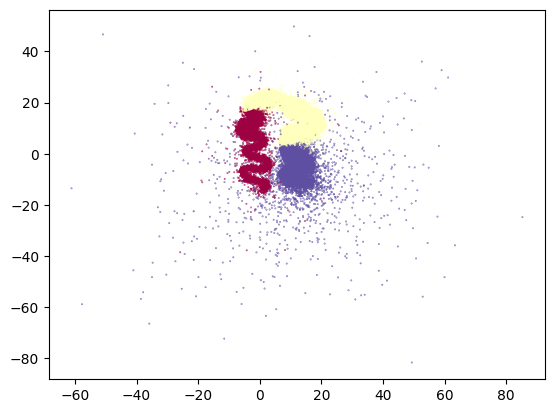

In [28]:
plt.scatter(dens_mapper.embedding_[:, 0], dens_mapper.embedding_[:, 1], c=kmeans_labels_3, s=0.1, cmap='Spectral');

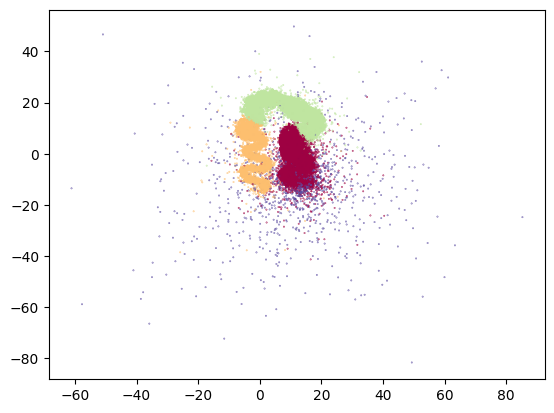

In [86]:
plt.scatter(dens_mapper.embedding_[:, 0], dens_mapper.embedding_[:, 1], c=kmeans_labels_4, s=0.1, cmap='Spectral');

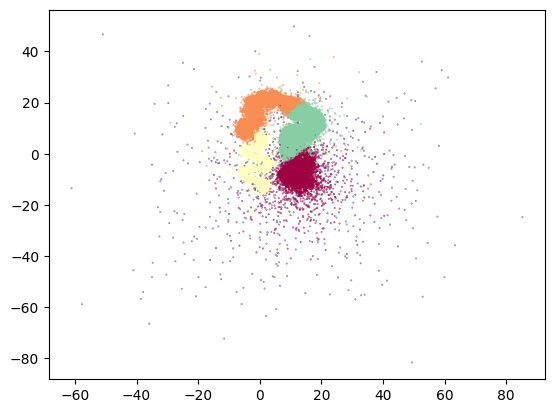

In [87]:
plt.scatter(dens_mapper.embedding_[:, 0], dens_mapper.embedding_[:, 1], c=kmeans_labels_5, s=0.1, cmap='Spectral');

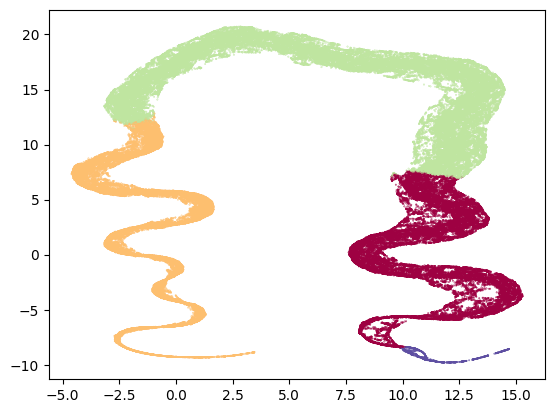

In [90]:
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=kmeans_labels_4, s=0.1, cmap='Spectral');

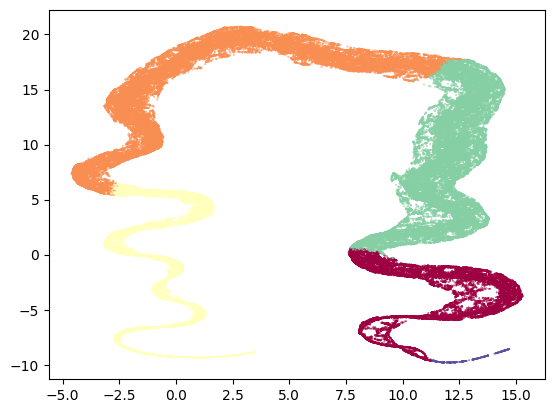

In [89]:
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=kmeans_labels_5, s=0.1, cmap='Spectral');

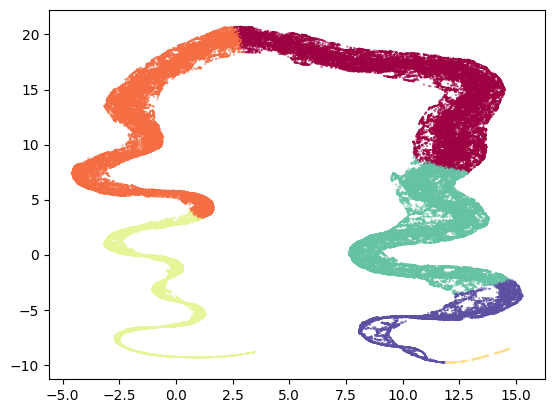

In [88]:
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=kmeans_labels_6, s=0.1, cmap='Spectral');

#### Cluster Measure

In [33]:
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score

In [31]:
print("K-means Silhoutter Score Cluster 3 : ", metrics.silhouette_score(embedding_mean_vector.values, kmeans_labels_3, metric='euclidean'))
print("K-means Silhoutter Score Cluster 4 : ", metrics.silhouette_score(embedding_mean_vector.values, kmeans_labels_4, metric='euclidean'))
print("K-means Silhoutter Score Cluster 5 : ", metrics.silhouette_score(embedding_mean_vector.values, kmeans_labels_5, metric='euclidean'))
print("K-means Silhoutter Score Cluster 6 : ", metrics.silhouette_score(embedding_mean_vector.values, kmeans_labels_6, metric='euclidean'))
print("K-means Silhoutter Score Cluster 7 : ", metrics.silhouette_score(embedding_mean_vector.values, kmeans_labels_7, metric='euclidean'))
print("K-means Silhoutter Score Cluster 8 : ", metrics.silhouette_score(embedding_mean_vector.values, kmeans_labels_8, metric='euclidean'))
print("K-means Silhoutter Score Cluster 9 : ", metrics.silhouette_score(embedding_mean_vector.values, kmeans_labels_9, metric='euclidean'))
print("K-means Silhoutter Score Cluster 10 : ", metrics.silhouette_score(embedding_mean_vector.values, kmeans_labels_10, metric='euclidean'))

K-means Silhoutter Score Cluster 3 :  0.5172846089361139
K-means Silhoutter Score Cluster 4 :  0.5214054309793442
K-means Silhoutter Score Cluster 5 :  0.5133221174305996
K-means Silhoutter Score Cluster 6 :  0.5062521891349063
K-means Silhoutter Score Cluster 7 :  0.5024977813970444
K-means Silhoutter Score Cluster 8 :  0.4966195892341444
K-means Silhoutter Score Cluster 9 :  0.49266763981046313
K-means Silhoutter Score Cluster 10 :  0.48565214548881863


In [32]:
print("GMM Silhoutter Score Cluster 3 : ", metrics.silhouette_score(embedding_mean_vector.values,  gmm_labels_3, metric='euclidean'))
print("GMM Silhoutter Score Cluster 4 : ", metrics.silhouette_score(embedding_mean_vector.values,  gmm_labels_4, metric='euclidean'))
print("GMM Silhoutter Score Cluster 5 : ", metrics.silhouette_score(embedding_mean_vector.values,  gmm_labels_5, metric='euclidean'))
print("GMM Silhoutter Score Cluster 6 : ", metrics.silhouette_score(embedding_mean_vector.values,  gmm_labels_6, metric='euclidean'))
print("GMM Silhoutter Score Cluster 7 : ", metrics.silhouette_score(embedding_mean_vector.values,  gmm_labels_7, metric='euclidean'))
print("GMM Silhoutter Score Cluster 8 : ", metrics.silhouette_score(embedding_mean_vector.values,  gmm_labels_8, metric='euclidean'))
print("GMM Silhoutter Score Cluster 9 : ", metrics.silhouette_score(embedding_mean_vector.values,  gmm_labels_9, metric='euclidean'))
print("GMM Silhoutter Score Cluster 10 : ", metrics.silhouette_score(embedding_mean_vector.values, gmm_labels_10, metric='euclidean'))

GMM Silhoutter Score Cluster 3 :  0.06533740533138176
GMM Silhoutter Score Cluster 4 :  -0.00516667958348661
GMM Silhoutter Score Cluster 5 :  -0.04078682515994337
GMM Silhoutter Score Cluster 6 :  -0.03561927675105798
GMM Silhoutter Score Cluster 7 :  -0.06654938601916685
GMM Silhoutter Score Cluster 8 :  -0.1190098444787974
GMM Silhoutter Score Cluster 9 :  -0.12998833113464128
GMM Silhoutter Score Cluster 10 :  -0.13261107085931573


In [36]:
print("K-means DB_index Cluster 3 : ",  davies_bouldin_score(embedding_mean_vector.values, kmeans_labels_3))
print("K-means DB_index Cluster 4 : ",  davies_bouldin_score(embedding_mean_vector.values, kmeans_labels_4))
print("K-means DB_index Cluster 5 : ",  davies_bouldin_score(embedding_mean_vector.values, kmeans_labels_5))
print("K-means DB_index Cluster 6 : ",  davies_bouldin_score(embedding_mean_vector.values, kmeans_labels_6))
print("K-means DB_index Cluster 7 : ",  davies_bouldin_score(embedding_mean_vector.values, kmeans_labels_7))
print("K-means DB_index Cluster 8 : ",  davies_bouldin_score(embedding_mean_vector.values, kmeans_labels_8))
print("K-means DB_index Cluster 9 : ",  davies_bouldin_score(embedding_mean_vector.values, kmeans_labels_9))
print("K-means DB_index Cluster 10 : ", davies_bouldin_score(embedding_mean_vector.values, kmeans_labels_10))

K-means DB_index Cluster 3 :  0.6065487605415009
K-means DB_index Cluster 4 :  0.5759929289785013
K-means DB_index Cluster 5 :  0.562770273727315
K-means DB_index Cluster 6 :  0.5566453044187921
K-means DB_index Cluster 7 :  0.5568198666698473
K-means DB_index Cluster 8 :  0.5524819038917778
K-means DB_index Cluster 9 :  0.5540641355289945
K-means DB_index Cluster 10 :  0.5606582817806216


In [37]:
from scipy.stats import wasserstein_distance

### 사후분석

In [54]:
interpretablity = pd.read_csv("./DL_dataset/test.csv")

In [55]:
interpretablity.columns  = "X_"+interpretablity.columns 

In [56]:
submit_test_origin = pd.read_csv("./data/loan_result.csv")
user_spec = pd.read_csv("./data/user_spec.csv")
submit_test_origin = submit_test_origin.merge(user_spec)
submit_test_origin = submit_test_origin[submit_test_origin["loanapply_insert_time"] >= "2022-06-01"]
submit_test_origin = submit_test_origin.reset_index().iloc[:, 1:]
submit_test_origin["is_applied"] = submit_data["is_applied"]

submit_test_origin = pd.concat([submit_test_origin, interpretablity], axis = 1)

In [57]:
k = submit_test_origin.merge(pd.DataFrame({"user_id":embedding_mean_vector.reset_index()["user_id"].values})).groupby("user_id").mean()

In [58]:
k  = k.drop(["application_id", "bank_id", "product_id", "personal_rehabilitation_complete_yn", "personal_rehabilitation_yn", "X_loan_rate", 'X_bank_id', 'X_product_id', 'X_loan_limit',
       'X_birth_year', 'X_gender', 'X_credit_score', 'X_yearly_income', 'X_desired_amount',  'X_existing_loan_cnt', 'X_existing_loan_amt', 'X_credit_score_nan',
       'X_gender_birth_nan', 'X_existing_loan_cnt_binary',
       'X_loan_limit/max_loan_limit_binary',
       'X_loan_rate/min_loan_rate_binary', 'X_is_applied'
            ], axis = 1)

In [60]:
k["label_3"] = kmeans_labels_3
k["label_4"] = kmeans_labels_4
k["label_5"] = kmeans_labels_5
k["label_6"] = kmeans_labels_6
k["label_7"] = kmeans_labels_7
k["label_8"] = kmeans_labels_8
k["label_9"] = kmeans_labels_9
k["label_10"] = kmeans_labels_10

In [72]:
print("3 cluster : 0,1 | loan_rate/min_loan_rate", wasserstein_distance(k[k["label_3"] == 0]['X_loan_rate/min_loan_rate'].values, k[k["label_3"] == 1]['X_loan_rate/min_loan_rate'].values))
print("3 cluster : 1,2 | loan_rate/min_loan_rate", wasserstein_distance(k[k["label_3"] == 1]['X_loan_rate/min_loan_rate'].values, k[k["label_3"] == 2]['X_loan_rate/min_loan_rate'].values))
print("3 cluster : 0,2 | loan_rate/min_loan_rate", wasserstein_distance(k[k["label_3"] == 0]['X_loan_rate/min_loan_rate'].values, k[k["label_3"] == 2]['X_loan_rate/min_loan_rate'].values))

3 cluster : 0,1 | loan_rate/min_loan_rate 0.5321903396317718
3 cluster : 1,2 | loan_rate/min_loan_rate 0.24687580175587656
3 cluster : 0,2 | loan_rate/min_loan_rate 0.7790661413876483


In [80]:
k.reset_index().groupby("label_4").mean().T.round(2)

label_4,0,1,2,3
user_id,438288.79,4.396657e+05,438978.92,446651.71
loan_limit,11759433.79,2.256196e+07,17413067.28,11138463.26
loan_rate,15.89,1.187000e+01,14.22,16.37
is_applied,0.60,6.000000e-02,0.23,0.63
birth_year,1982.52,1.982620e+03,1982.10,1982.69
gender,0.65,7.000000e-01,0.66,0.63
credit_score,623.01,7.836000e+02,669.05,620.86
yearly_income,40447581.80,4.999635e+07,44612653.90,38186971.30
company_enter_month,19140774.37,1.919897e+07,19071644.73,19286299.89
desired_amount,18185285.63,7.039882e+07,34124172.79,16695461.11


In [81]:
k.reset_index().groupby("label_5").mean().T.round(2)

label_5,0,1,2,3,4
user_id,437661.50,439590.87,4.393859e+05,438883.28,442520.79
loan_limit,9940504.97,18824488.50,2.382026e+07,14882054.08,12219486.02
loan_rate,16.06,13.23,1.165000e+01,15.40,16.56
is_applied,0.70,0.14,4.000000e-02,0.40,0.60
birth_year,1983.05,1982.17,1.982770e+03,1982.04,1982.26
gender,0.66,0.67,7.100000e-01,0.65,0.63
credit_score,616.25,693.46,8.152700e+02,639.49,624.90
yearly_income,37792914.26,44615380.70,5.243724e+07,43928742.93,39873915.81
company_enter_month,19147401.81,19105987.17,1.920334e+07,19102300.53,19333942.65
desired_amount,12654173.84,40267679.28,8.004493e+07,27639234.98,20560780.53


In [91]:
k.reset_index().drop(["label_3","label_7","label_8","label_9","label_10"], axis = 1).to_csv("./submit/cluster_user.csv", index = False)